Resizing is done
npy array saving is done
Netherlands Amsterdam


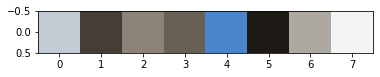

Hong Kong


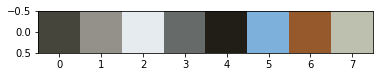

US Phoenix


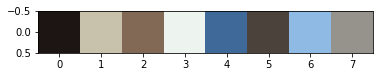

US New York


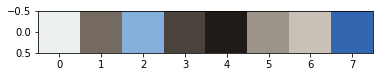

Lithuania Vilnius


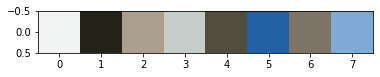

US Chicago


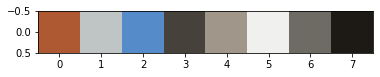

Czechia Republic Prague


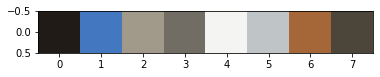

US Philadelphia


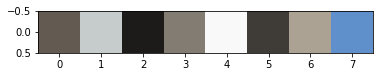

US San Jose


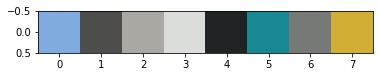

Singapore


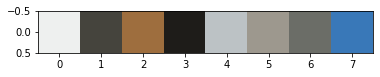

Monaco Monaco


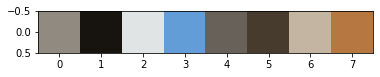

US San Francisco


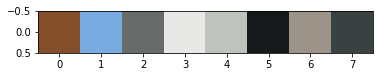

Luxembourg Luxembourg


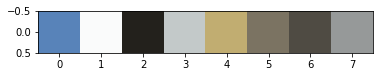

Turkey Istanbul


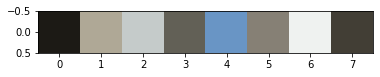

Thailand Bangkok


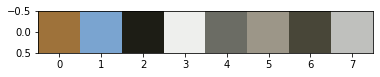

UAE Dubai


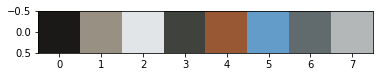

US San Diego


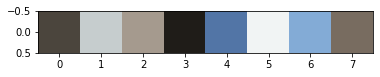

US San Antonio


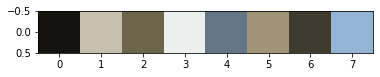

US Dallas


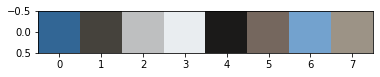

US Houston


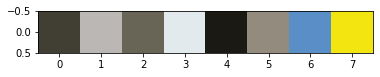

Czechia Prague


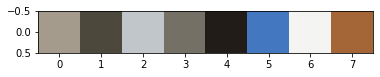

Italy Rome


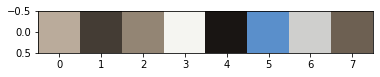

Italy Milan


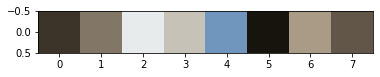

US Stockton


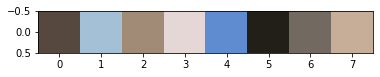

South Korea Seoul


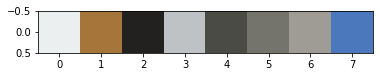

In [1]:
!pip install pillow numpy pandas sklearn matplotlib
%matplotlib inline
import random
import sys

from PIL import Image, ExifTags
from PIL import ImageOps
import os
import numpy as np
from PIL import Image
from PIL import ImageOps
import os
import pandas as pd
import numpy as np
import json


image_files = os.listdir("./images")
for file in image_files:
    if file.startswith("."):
        continue
    if os.path.exists(f"./images_resized/{file}"):
        continue
    filename = f"./images/{file}"
    try:
        image = Image.open(filename)
        if image._getexif() is not None:
            exif = dict(image._getexif().items())

            for orientation in ExifTags.TAGS.keys():
                if ExifTags.TAGS[orientation] == 'Orientation': break
            if orientation in exif:
                if exif[orientation] == 3:
                    image = image.rotate(180, expand=True)
                elif exif[orientation] == 6:
                    image = image.rotate(270, expand=True)
                elif exif[orientation] == 8:
                    image = image.rotate(90, expand=True)
        # image2 = ImageOps.contain(image, (512, 512))
        image2 = image.resize((128, 128))
        image2.save(f"./images_resized/{file}")
        image.close()
        image2.close()
    except:
        None
#    print(f"{file} done")

print("Resizing is done")

image_files = os.listdir("./images_resized")
for file in image_files:
    if file.startswith("."):
        continue
    if os.path.exists(f"./images_resized_npy/{file}.npy"):
        continue
    filename = f"./images_resized/{file}"
    image = Image.open(filename)

    image_sequence = image.getdata()
    image_array = np.array(image_sequence)
    image.close()
    np.save(f"./images_resized_npy/{file}", image_array)
    # print(f"{file} done")

print("npy array saving is done")

csv_data = pd.read_csv("ktu_didziuju_ld2_final.csv", sep = ';', dtype = {'instance_of': str, 'pageview_count': float, 'registered_contributors_count': float, 'anonymous_contributors_count': float, 'num_wikipedia_lang_pages': float, 'is_shop': int, 'is_tourism': int, 'is_leisure': int, 'is_other': int, 'has_image': int, 'description': str, 'image_files': str})
csv_data = csv_data[['city_name', 'image_files']]
for city_name in csv_data['city_name'].unique():
#     city_name = csv_data['city_name'].unique()[0]

    mask = csv_data['city_name'] == city_name
    image_files = ','.join(csv_data[mask]['image_files'].dropna()).split(',')
    image_files = list(map(lambda e: './images_resized_npy/' + e + ".npy", image_files))
    images_data = []
    for image_file in image_files:
        try:
            img_array = np.load(image_file)
            images_data.extend(img_array)
        except:
            None
    images_data = list(map(lambda e: e.tolist(), images_data))
    images_data = list(filter(lambda e: type(e) == list and len(e) == 3, images_data))
    images_data = np.asarray(images_data)


    # do k means

    data_normal = images_data
    num_rows, num_columns = data_normal.shape
#     print(f"{num_rows} {num_columns}")

    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    kmeans = KMeans(n_clusters=8)
    kmeans.fit(data_normal)

    print(city_name)
    cc = []
    for color_rgb in kmeans.cluster_centers_:
        color = (color_rgb[0] / 255, color_rgb[1] / 255, color_rgb[2] / 255)
        cc.append(color)

    plt.figure()
    plt.imshow([cc])
    plt.show()
